In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from scipy.signal import butter, lfilter, freqz
from scipy import signal

def check_data_points(filename):
    data_frame = pd.read_csv(filename, skiprows=[0], header= None)
    required_data = data_frame.iloc[:, 9:]
    return required_data

def get_time_domain_data_without_offset(data_frame):
    time_domain_data_without_offset = data_frame.sub(data_frame.mean(axis=1), axis=0).values
    return time_domain_data_without_offset

cutoff = 25e3 #in Hz
fs = 114e3 
order = 5
NOISE_SIZE = 300
ECHO_SIZE = 512
THRESHOLD = 0.30

def butter_lowpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    #y = lfilter(b, a, data)
    y = signal.filtfilt(b, a, data)
    return y

def use_low_pass_filter(data_values):
    data_after_applying_filter = []
    for i, data in enumerate(data_values):
        y = butter_lowpass_filter(data, cutoff, fs, order)
        result = data - y
        data_after_applying_filter.append(result)
    return data_after_applying_filter

def peak_value(data):
    max_point_distance = 0
    peakData = 0
    max_point_distance = np.array(data).argmax()
    peakData = np.array(data).max()
    if peakData > THRESHOLD:
        return max_point_distance
    else: 
        return None
    
def get_echos(filtered_values):
    all_echo_range = [] 
    for index, data in enumerate(filtered_values):
        chopped_data = data[NOISE_SIZE:]
        max_point_distance = peak_value(chopped_data)
        if max_point_distance:
            cutting_distance = max_point_distance - 250
            if cutting_distance > 0:
                echo_range = chopped_data[cutting_distance:]
                echo_range = echo_range[:ECHO_SIZE]
                all_echo_range.append(echo_range)
    return all_echo_range

def plot_graphs(data):
    fig = plt.figure(figsize=(30, 20))
    for index, data in enumerate(data):
        ax = fig.add_subplot(8, 8, index+1)
        ax.plot(data)

In [3]:
#Import files and plot with offset values

# file_set= [1,2,3,4,5,6,7,8,9]
file_set= [1,2,3,4,5,6]
distance_set = [80] 
# folder_set = ['67_Ford_Black_front', '26_Ford_Black_back', '99_Fiesta_Purple_side', 'Human_A', 'Human_B', 'Human_C', 'Pillar', 'Stopper']
folder_set = ['Human_A']

# sub_folder_set = ['Front', 'Back', 'Side', 'Human', 'Human', 'Human', 'Pillar','Stopper']
sub_folder_set = ['Human']
data_with_offset = []
for i, folder_name in enumerate(folder_set):
    file_name = sub_folder_set[i]
#     print(folder_name, file_name)
    for distance in (distance_set):
        for file_number in file_set:
            filename = '../Documents/data_set/New_Data_Set/{}/{}_{}/{}.csv'.format(folder_name, file_name, distance, file_number)
#             print(filename)
            required_data_with_offset = check_data_points(filename)
            data_with_offset.append(required_data_with_offset)
#             plot_graphs(required_data_with_offset.values)
#             print(required_data_with_offset.values)

In [4]:
#Minimize the offset value

data_without_offset = []
for i, data in enumerate(data_with_offset):
    required_data_without_offset = get_time_domain_data_without_offset(data)
    data_without_offset.append(required_data_without_offset)
#     plot_graphs(required_data_without_offset)
#     print(required_data_without_offset)

In [5]:
#using low pass filter

data_after_filter = []
for i, data in enumerate(data_without_offset):
    data_frame_after_using_filter = use_low_pass_filter(data)
#     print(data_frame_after_using_filter)
    data_after_filter.append(data_frame_after_using_filter)
#     plot_graphs(data_frame_after_using_filter)

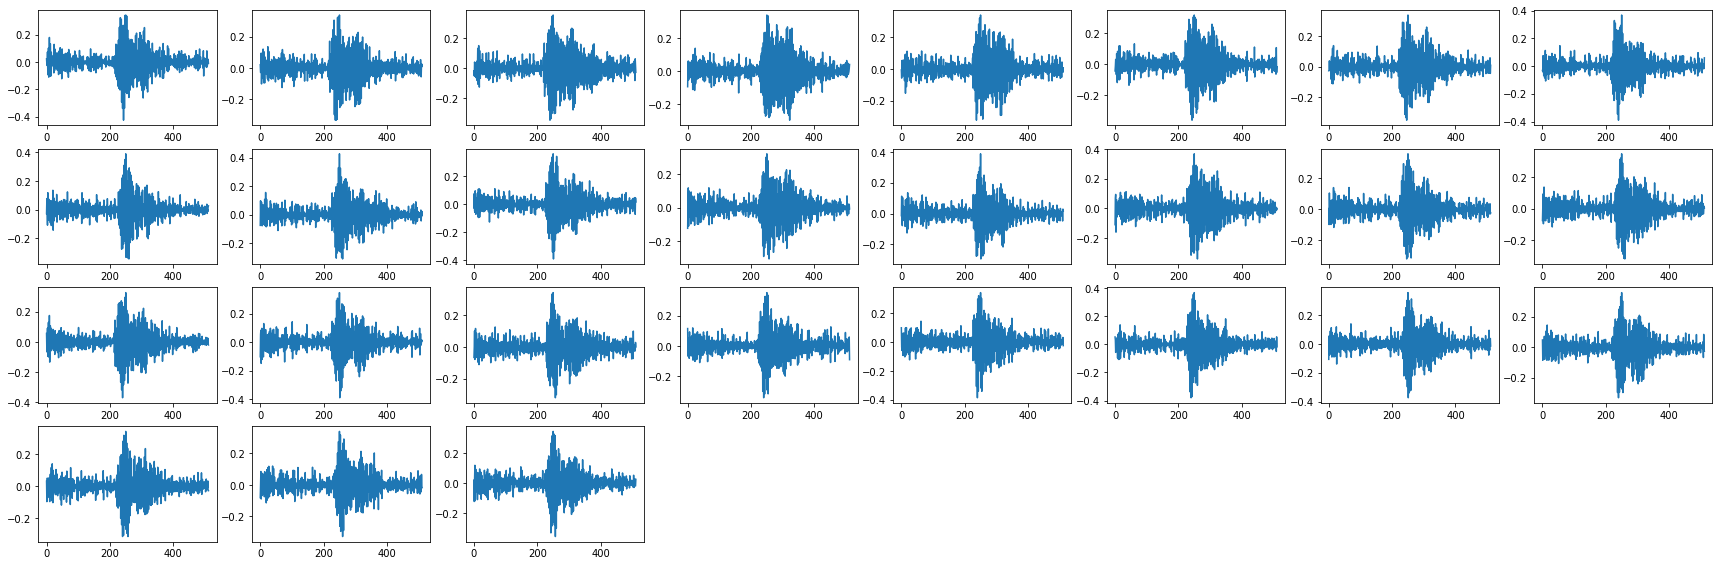

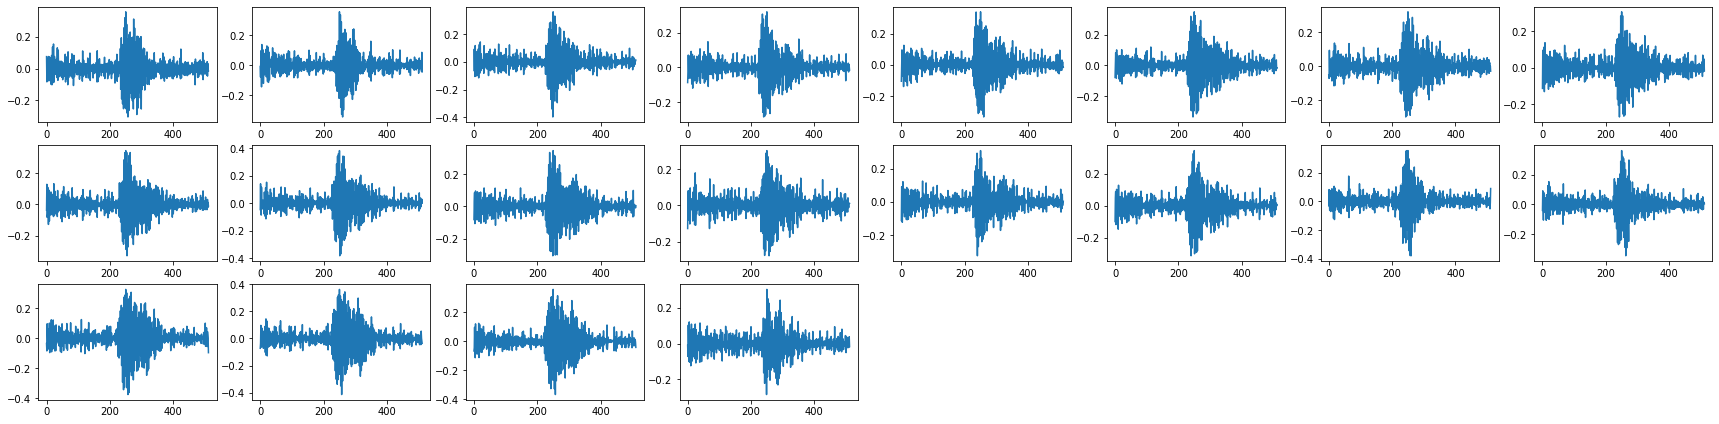

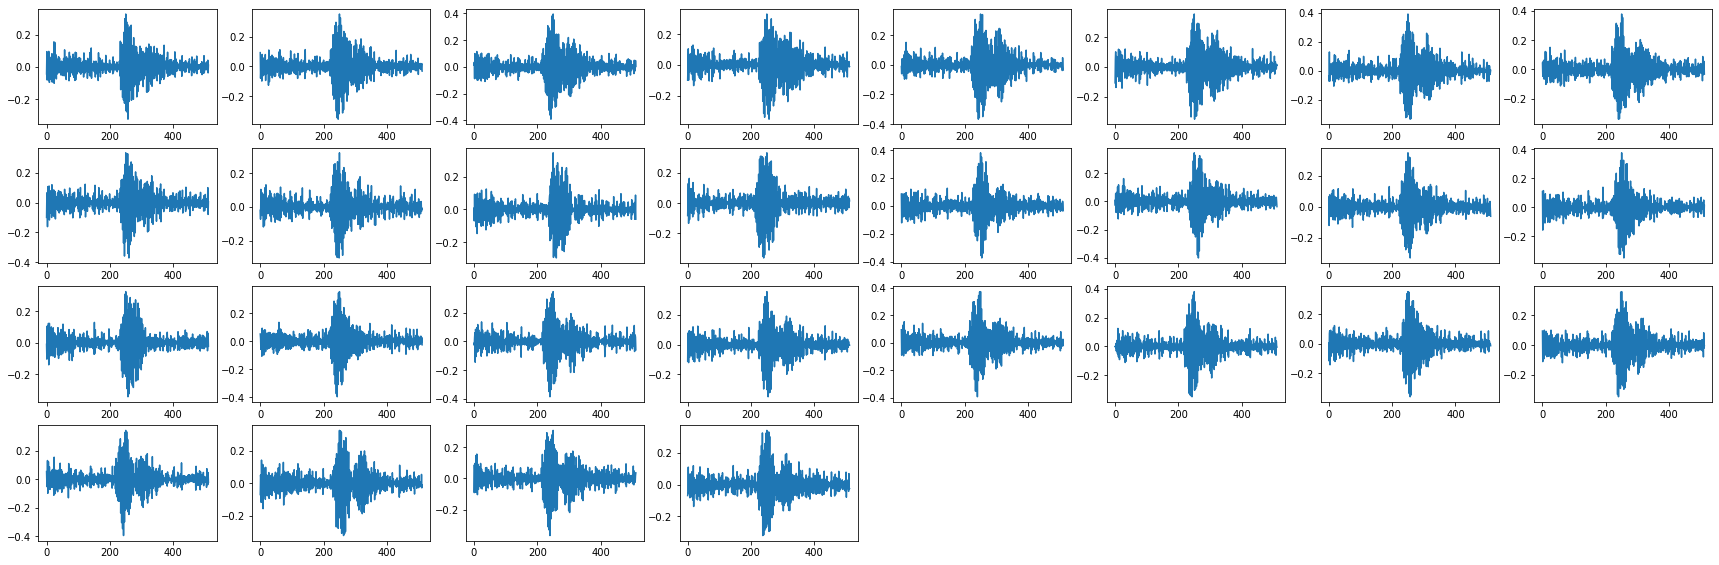

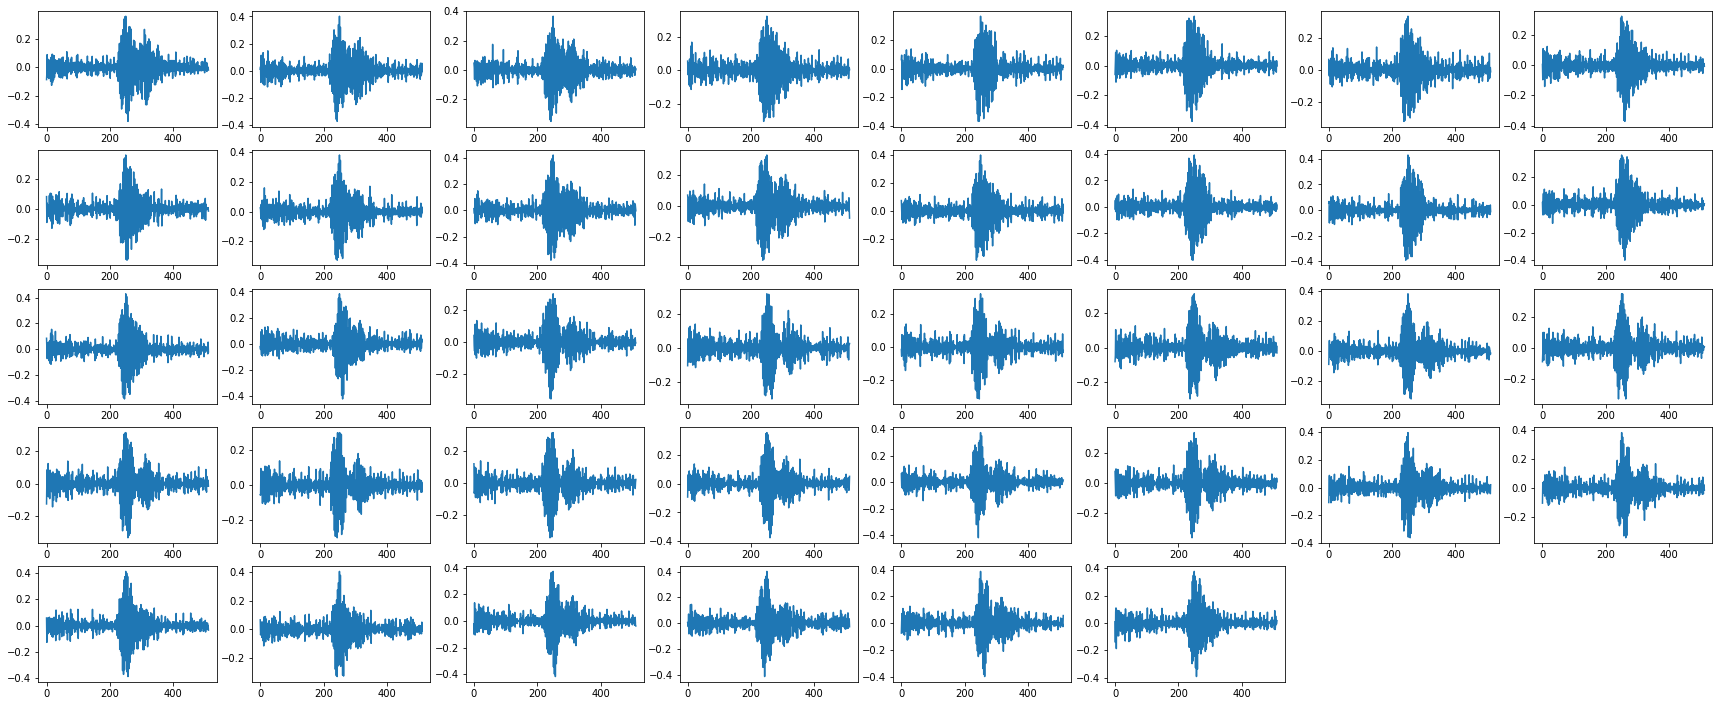

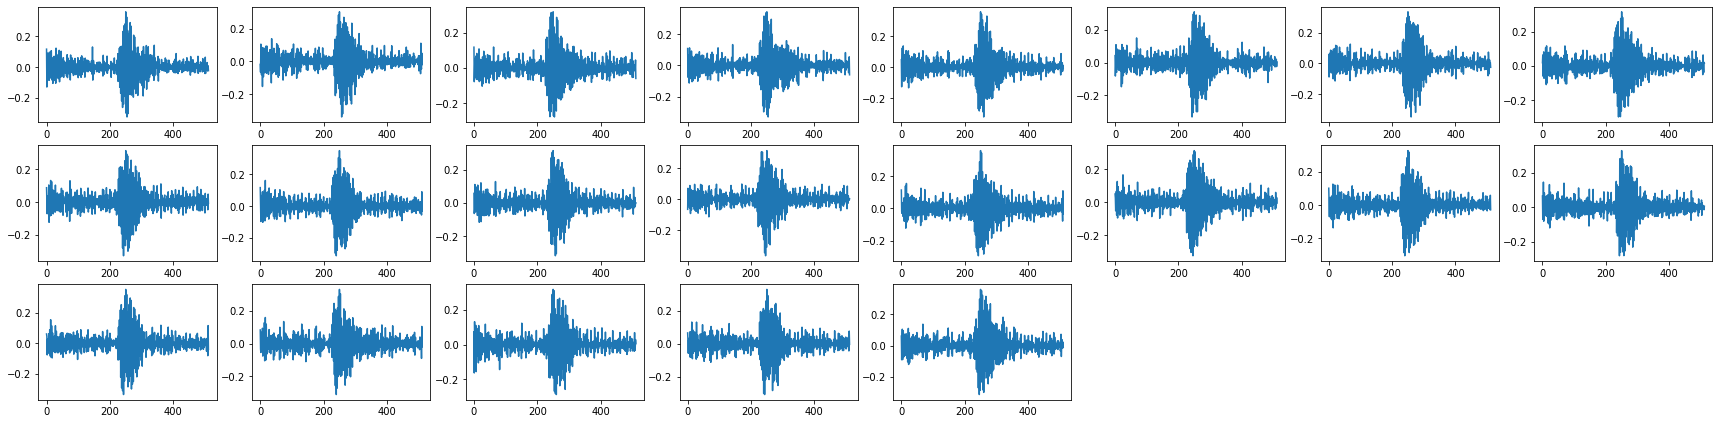

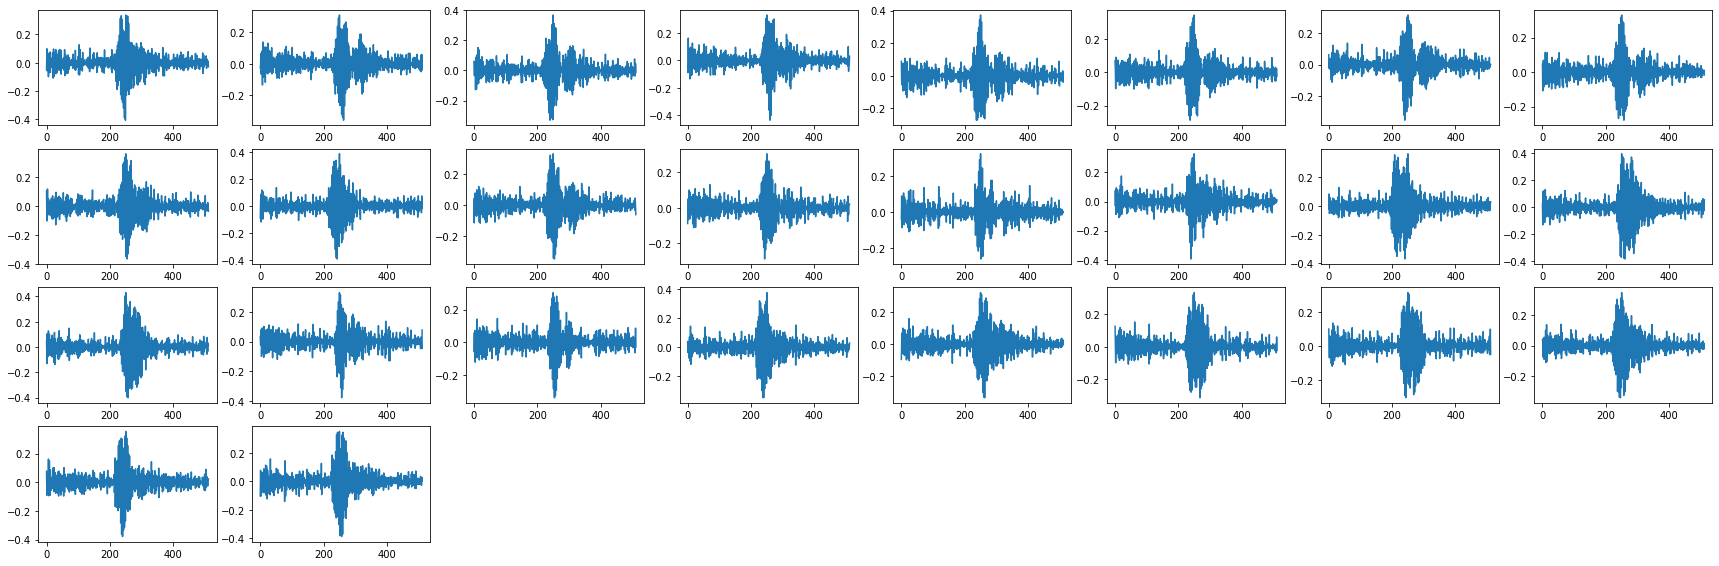

In [6]:
#required echos

for i, data in enumerate(data_after_filter):
    required_echos = get_echos(data)
    plot_graphs(required_echos)